In [362]:
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [363]:
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
column_names = ["","id","date","flag","user","text"]
data = pd.read_csv("ProjectTweets.csv", names=column_names)

In [4]:
data.head(10)

,,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,6,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,7,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,8,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [5]:
data.tail(10)


,,id,date,flag,user,text
1599990,1599990,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599991,1599991,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,1599992,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,1599993,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599994,1599994,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha..."
1599995,1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,1599999,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [6]:
data.shape

(1600000, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0           1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [9]:
def get_sentiment(text):
    sia=SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    
    compound_score = sentiment_scores["compound"]
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"
    

In [10]:
data['processed_text'] = data['text'].apply(get_text_processing)
data.head()

,,id,date,flag,user,text,processed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl Awww thats bumm...
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update Facebook texting might cry r...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan dived many times ball Managed save 50...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see


In [17]:
data['sentiment'] = data['processed_text'].apply(get_sentiment)
data.head()

,,id,date,flag,user,text,processed_text,sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl Awww thats bumm...,Negative
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update Facebook texting might cry r...,Negative
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan dived many times ball Managed save 50...,Positive
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,Negative
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see,Negative


In [19]:
#data10 = data.head(10)
data.tail()


,,id,date,flag,user,text,processed_text,sentiment
1599995,1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feeling ever,Positive
1599996,1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom cool hear old Walt interviews â« ht...,Positive
1599997,1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,ready MoJo Makeover Ask details,Positive
1599998,1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday boo alll time Tupac Amaru ...,Positive
1599999,1599999,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,happy charitytuesday theNSPCC SparksCharity Sp...,Positive


In [18]:
#data10['sentiment'] = data10['processed_text'].apply(get_sentiment)
#data10.head(10)

In [20]:
#data.to_csv('Tweets_sentiment.csv', index=False)

In [292]:
data_sentiments = data[['date', 'processed_text', 'sentiment']]
data_sentiments.head()

,date,processed_text,sentiment
0,Mon Apr 06 22:19:45 PDT 2009,switchfoot httptwitpiccom2y1zl Awww thats bumm...,Negative
1,Mon Apr 06 22:19:49 PDT 2009,upset cant update Facebook texting might cry r...,Negative
2,Mon Apr 06 22:19:53 PDT 2009,Kenichan dived many times ball Managed save 50...,Positive
3,Mon Apr 06 22:19:57 PDT 2009,whole body feels itchy like fire,Negative
4,Mon Apr 06 22:19:57 PDT 2009,nationwideclass behaving im mad cant see,Negative


In [64]:
#data_sentiment.to_csv('Tweets_sentiment_.csv', index=False)


In [296]:
from datetime import datetime

def convert_to_YYYY_MM_DD(date_str):
    original = datetime.strptime(date_str, '%a %b %d %H:%M:%S PDT %Y')
    formated = original.strftime('%Y-%m-%d')
    return formated

data_sentiments = data_sentiment.copy()
data_sentiments['date'] = data_sentiment['date'].apply(convert_to_YYYY_MM_DD)

#data_sentiment['date'] = pd.to_datetime(data_sentiment['date']).dt.date

In [279]:
data_sentiments.head()

,date,processed_text,sentiment
0,2009-04-06-22,switchfoot httptwitpiccom2y1zl Awww thats bumm...,Negative
1,2009-04-06-22,upset cant update Facebook texting might cry r...,Negative
2,2009-04-06-22,Kenichan dived many times ball Managed save 50...,Positive
3,2009-04-06-22,whole body feels itchy like fire,Negative
4,2009-04-06-22,nationwideclass behaving im mad cant see,Negative


In [261]:
one_hot = pd.get_dummies(data_sentiments['sentiment'])
data_sentiment.drop(['sentiment'],axis=1,inplace=True)
data_sentiment = pd.concat([data_sentiment,one_hot],axis=1)
data_sentiment.head()

C:\Users\darre\AppData\Local\Temp\ipykernel_39668\4071658011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiments.drop(['sentiment'],axis=1,inplace=True)


,date,processed_text,Negative,Neutral,Positive
0,Mon Apr 06 22:19:45 PDT 2009,switchfoot httptwitpiccom2y1zl Awww thats bumm...,1,0,0
1,Mon Apr 06 22:19:49 PDT 2009,upset cant update Facebook texting might cry r...,1,0,0
2,Mon Apr 06 22:19:53 PDT 2009,Kenichan dived many times ball Managed save 50...,0,0,1
3,Mon Apr 06 22:19:57 PDT 2009,whole body feels itchy like fire,1,0,0
4,Mon Apr 06 22:19:57 PDT 2009,nationwideclass behaving im mad cant see,1,0,0


In [262]:
#data_sentiments['Negative'] = data_sentiments['Negative'] * -1
data_sentiment['Neutral'] = data_sentiment['Neutral'] * 0

In [263]:
data_sentiment.head()

,date,processed_text,Negative,Neutral,Positive
0,Mon Apr 06 22:19:45 PDT 2009,switchfoot httptwitpiccom2y1zl Awww thats bumm...,1,0,0
1,Mon Apr 06 22:19:49 PDT 2009,upset cant update Facebook texting might cry r...,1,0,0
2,Mon Apr 06 22:19:53 PDT 2009,Kenichan dived many times ball Managed save 50...,0,0,1
3,Mon Apr 06 22:19:57 PDT 2009,whole body feels itchy like fire,1,0,0
4,Mon Apr 06 22:19:57 PDT 2009,nationwideclass behaving im mad cant see,1,0,0


In [267]:
data_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1600000 non-null  object
 1   processed_text  1600000 non-null  object
 2   Negative        1600000 non-null  uint8 
 3   Neutral         1600000 non-null  uint8 
 4   Positive        1600000 non-null  uint8 
dtypes: object(2), uint8(3)
memory usage: 29.0+ MB


In [297]:
numeric = ['date','Negative', 'Neutral', 'Positive']
numeric_df = data_sentiment[numeric]

mean_sentiment = numeric_df.groupby('date').mean().reset_index()
mean_sentiment['date'] = pd.to_datetime(mean_sentiment['date'])
mean_sentiment['total_sentiment'] = mean_sentiment['Negative'] + mean_sentiment['Neutral'] + mean_sentiment['Positive']  
sentiment_df = mean_sentiment[['date','total_sentiment']]
print(sentiment_df)

KeyError: "['Negative', 'Neutral', 'Positive'] not in index"

In [298]:
mean_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             48 non-null     datetime64[ns]
 1   Negative         48 non-null     float64       
 2   Neutral          48 non-null     float64       
 3   Positive         48 non-null     float64       
 4   total_sentiment  48 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.0 KB


[]

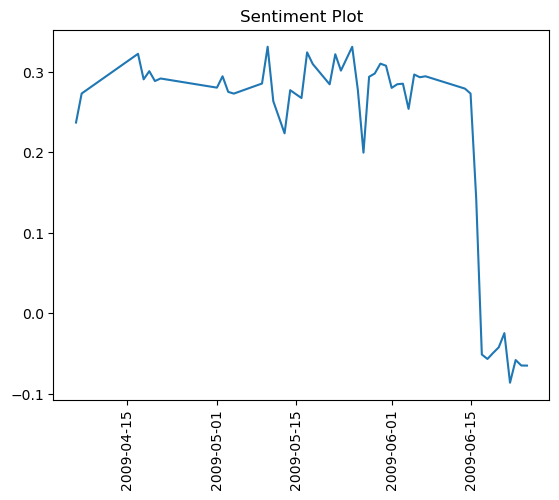

In [299]:
x_ = sentiment_df['date']
y_ = sentiment_df['total_sentiment']

plt.plot(x_, y_)
plt.title('Sentiment Plot')
plt.xticks(rotation=90)
plt.plot()

## ARIMA model for time series


In [382]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [486]:
first_date = sentiment_df['date'].min()
final_date = sentiment_df['date'].max()
date_range = pd.date_range(start=first_date, end=final_date)
date_range_df = pd.DataFrame({'date': date_range})

sentiment_dates = date_range_df.merge(sentiment_df, how='left', left_on='date', right_on='date').set_index('date')
sentiment_dates.head(10)

,total_sentiment
date,
2009-04-06,0.237202
2009-04-07,0.273294
2009-04-08,NaN
2009-04-09,NaN
2009-04-10,NaN
2009-04-11,NaN
2009-04-12,NaN
2009-04-13,NaN
2009-04-14,NaN


In [487]:
sentiment_dates['total_sentiment'] = sentiment_dates['total_sentiment'].interpolate(method='linear')
sentiment_dates.head()

,total_sentiment
date,
2009-04-06,0.237202
2009-04-07,0.273294
2009-04-08,0.278228
2009-04-09,0.283162
2009-04-10,0.288096


[]

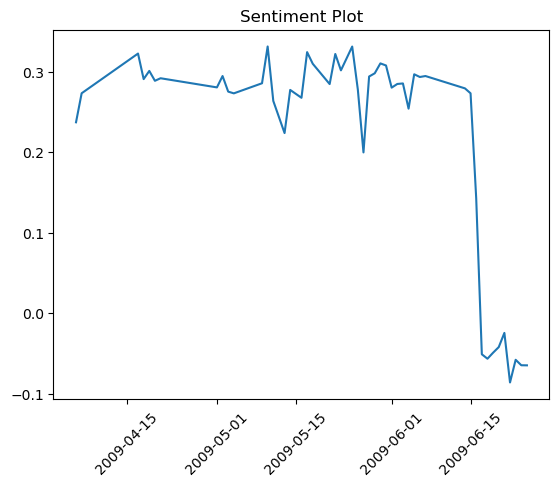

In [488]:

plt.plot(sentiment_dates)
plt.title('Sentiment Plot')
plt.xticks(rotation=45)
plt.plot()

In [489]:
#test-train split

train_size = int(0.9 * len(sentiment_dates))

#train, test = sentiment_dates.iloc[:train_size], sentiment_dates.iloc[train_size:]

train, test = sentiment_dates[0:train_size+1], sentiment_dates[train_size:]

,total_sentiment
date,
2009-04-06,0.237202
2009-04-07,0.273294
2009-04-08,0.278228
2009-04-09,0.283162
2009-04-10,0.288096
...,...
2009-06-13,0.281566
2009-06-14,0.279376
2009-06-15,0.273235


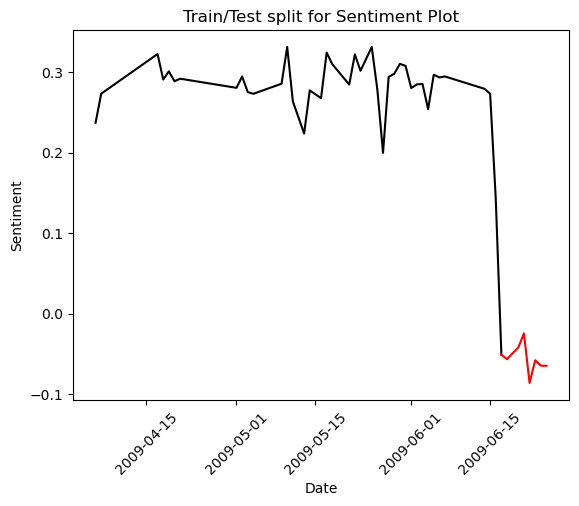

In [490]:

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sentiment Plot")
plt.show()

In [491]:
y = train['total_sentiment']

ARMA_model = ARIMA(y, order=(1, 0, 1))
ARMA_fit = ARMA_model.fit()

ARMA_predictions = ARMA_fit.forecast(steps=len(test))

print("Predicted Values:\n", ARMA_predictions)

Predicted Values:
 2009-06-18   -0.060104
2009-06-19   -0.011031
2009-06-20    0.030317
2009-06-21    0.065159
2009-06-22    0.094516
2009-06-23    0.119253
2009-06-24    0.140097
2009-06-25    0.157661
2009-06-26    0.172460
Freq: D, Name: predicted_mean, dtype: float64


In [492]:
ARMA_rmse = np.sqrt(mean_squared_error(test["total_sentiment"].values, ARMA_predictions))
print("ARMA_RMSE: ",ARMA_rmse)

ARMA_RMSE:  0.15685955945329225


In [493]:
y = train['total_sentiment']

ARIMA_model = ARIMA(y, order=(5, 1, 5))
ARIMA_fit = ARIMA_model.fit()

ARIMA_predictions = ARIMA_fit.forecast(steps=len(test))

print("Predicted Values:\n", ARIMA_predictions)

Predicted Values:
 2009-06-18   -0.074984
2009-06-19   -0.036831
2009-06-20    0.011683
2009-06-21   -0.006114
2009-06-22   -0.060234
2009-06-23   -0.074752
2009-06-24   -0.076636
2009-06-25   -0.072001
2009-06-26   -0.037825
Freq: D, Name: predicted_mean, dtype: float64


In [494]:
ARIMA_rmse = np.sqrt(mean_squared_error(test["total_sentiment"].values, ARIMA_predictions))
print("ARIMA_RMSE: ",ARIMA_rmse)

ARIMA_RMSE:  0.03073058968391005


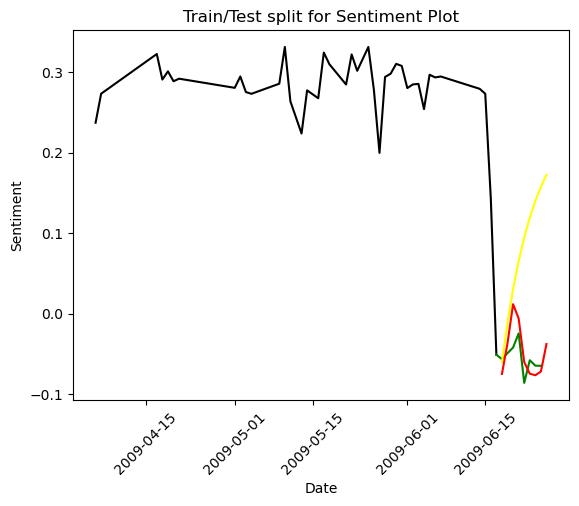

In [501]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "green", label = 'Testing')
plt.plot(ARMA_predictions, color = "yellow", label = 'ARMA')
plt.plot(ARIMA_predictions, color = "red", label = 'ARIMA')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sentiment Plot")
plt.show()

In [496]:
forecast_steps = [7, 30, 92]
forecast = ARIMA_fit.get_forecast(steps=max(forecast_steps))
forecast_index = pd.date_range(start=test.index[-1], periods = max(forecast_steps) +1, freq='D')
forecast_values = forecast.predicted_mean.reindex(forecast_index)

In [497]:
forecast_values

2009-06-25   -0.072001
2009-06-26   -0.037825
2009-06-27   -0.004799
2009-06-28   -0.013045
2009-06-29   -0.042157
                ...   
2009-09-21         NaN
2009-09-22         NaN
2009-09-23         NaN
2009-09-24         NaN
2009-09-25         NaN
Freq: D, Name: predicted_mean, Length: 93, dtype: float64

In [498]:
#pip install dash pandas statsmodels


In [499]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [519]:
# Define axis ranges
x_axis_range = [train.index.min(), forecast_values.index.max()]
y_axis_range = [min(train.min()), max(train.max())]
#y_axis_range = [min(train.min(), test.min(), predicted_mean.min()), max(train.max(), test.max(), predicted_mean.max())]

train_values=train['total_sentiment']
test_values=test['total_sentiment']


# Dash app
app = dash.Dash(__name__)

# layout
app.layout = html.Div([
    html.H1("ARIMA Forecast Dashboard"),
    
    dcc.Graph(
        id='combined-graph',
        figure={
            'data': [
                {'x': train.index, 'y': train_values.values, 'type': 'lines', 'name': 'Training Data','line': {'color': 'black'}},
                {'x': test.index, 'y': test_values.values, 'type': 'lines', 'name': 'Testing Data', 'line': {'color': 'green'}},
                {'x': ARIMA_predictions.index, 'y': ARIMA_predictions.values, 'type': 'lines', 'name': 'ARIMA Predictions - test', 'line': {'color': 'red'}},                
                {'x': forecast_values.index, 'y': forecast_values.values, 'type': 'lines', 'name': 'ARIMA Predictions - forecast', 'line': {'color': 'red'}}
            ],
            'layout': {'title': 'Training Data, Testing Data, and ARIMA Predictions', 'xaxis': {'title': 'Date'}, 'yaxis': {'title': 'Sentiment'}}
        }
    ),
])

if __name__ == '__main__':
    app.run_server(debug=True)

